# Data Manipulation

## Constructing a DataFrame

In [171]:
subject = ['ann', 'bob', 'charles', 'david', 'ella']
sex = ['F', 'M', 'M', 'M', 'F']
group = ['A', 'A', 'A', 'B', 'B']
age = [23, 34, 27, 30, 27]
score = [89, 90, 78, 98, 90]
df = pd.DataFrame(data = {'name': subject, 'sex': sex, 'age': age, 'group': group, 'score': score})

In [172]:
df

,age,group,name,score,sex
0,23,A,ann,89,F
1,34,A,bob,90,M
2,27,A,charles,78,M
3,30,B,david,98,M
4,27,B,ella,90,F


## Getting basic information

In [173]:
df.dtypes

age       int64
group    object
name     object
score     int64
sex      object
dtype: object

In [174]:
df.shape

(5, 5)

In [175]:
df.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [176]:
df.columns

Index(['age', 'group', 'name', 'score', 'sex'], dtype='object')

In [177]:
df = df[['name', 'sex', 'age', 'group', 'score']]
df

,name,sex,age,group,score
0,ann,F,23,A,89
1,bob,M,34,A,90
2,charles,M,27,A,78
3,david,M,30,B,98
4,ella,F,27,B,90


## Row subsets

In [178]:
df.head(2)

,name,sex,age,group,score
0,ann,F,23,A,89
1,bob,M,34,A,90


In [179]:
df.tail(2)

,name,sex,age,group,score
3,david,M,30,B,98
4,ella,F,27,B,90


In [180]:
df.sample(2)

,name,sex,age,group,score
0,ann,F,23,A,89
2,charles,M,27,A,78


## Column subsets

In [181]:
df['name']

0        ann
1        bob
2    charles
3      david
4       ella
Name: name, dtype: object

In [182]:
df.name

0        ann
1        bob
2    charles
3      david
4       ella
Name: name, dtype: object

In [183]:
df[[0]]

,name
0,ann
1,bob
2,charles
3,david
4,ella


In [184]:
df[['age', 'sex']]

,age,sex
0,23,F
1,34,M
2,27,M
3,30,M
4,27,F


In [185]:
df[[1,2]]

,sex,age
0,F,23
1,M,34
2,M,27
3,M,30
4,F,27


## Indexing

In [186]:
df.ix[0,0]

'ann'

In [187]:
df.ix[1,1]

'M'

In [188]:
df.ix[1:4, :2]

,name,sex
1,bob,M
2,charles,M
3,david,M
4,ella,F


In [189]:
df.ix[[1,3,4], ['age', 'name']]

,age,name
1,34,bob
3,30,david
4,27,ella


## Logical indexing

In [190]:
df[df.age > 25]

,name,sex,age,group,score
1,bob,M,34,A,90
2,charles,M,27,A,78
3,david,M,30,B,98
4,ella,F,27,B,90


In [191]:
df[(df.age > 25) & (df.sex == 'M')]

,name,sex,age,group,score
1,bob,M,34,A,90
2,charles,M,27,A,78
3,david,M,30,B,98


## Sorting

In [192]:
df.sort_values('age')

,name,sex,age,group,score
0,ann,F,23,A,89
2,charles,M,27,A,78
4,ella,F,27,B,90
3,david,M,30,B,98
1,bob,M,34,A,90


In [193]:
df.sort_values('age', ascending = False)

,name,sex,age,group,score
1,bob,M,34,A,90
3,david,M,30,B,98
2,charles,M,27,A,78
4,ella,F,27,B,90
0,ann,F,23,A,89


In [194]:
df.sort_values(['age', 'score'], ascending = ['True', 'True'])

,name,sex,age,group,score
0,ann,F,23,A,89
2,charles,M,27,A,78
4,ella,F,27,B,90
3,david,M,30,B,98
1,bob,M,34,A,90


In [195]:
df.sort_values(['age', 'score'], ascending = ['True', 'False'], inplace = True)
df

,name,sex,age,group,score
0,ann,F,23,A,89
2,charles,M,27,A,78
4,ella,F,27,B,90
3,david,M,30,B,98
1,bob,M,34,A,90


In [196]:
df.sort_index()

,name,sex,age,group,score
0,ann,F,23,A,89
1,bob,M,34,A,90
2,charles,M,27,A,78
3,david,M,30,B,98
4,ella,F,27,B,90


## Transformation

In [197]:
df['log_score'] = np.log(df['score'])
df

,name,sex,age,group,score,log_score
0,ann,F,23,A,89,4.488636
2,charles,M,27,A,78,4.356709
4,ella,F,27,B,90,4.499810
3,david,M,30,B,98,4.584967
1,bob,M,34,A,90,4.499810


In [198]:
df['adjusted_score'] = np.where(df.sex == 'M', df.score - 10, df.score)
df

,name,sex,age,group,score,log_score,adjusted_score
0,ann,F,23,A,89,4.488636,89
2,charles,M,27,A,78,4.356709,68
4,ella,F,27,B,90,4.499810,90
3,david,M,30,B,98,4.584967,88
1,bob,M,34,A,90,4.499810,80


## String Operations

In [199]:
df.name.str[:3]

0    ann
2    cha
4    ell
3    dav
1    bob
Name: name, dtype: object

In [205]:
df.name.str.upper()

0        ANN
2    CHARLES
4       ELLA
3      DAVID
1        BOB
Name: name, dtype: object

In [204]:
df.name.str.replace('a', 'A')

0        Ann
2    chArles
4       ellA
3      dAvid
1        bob
Name: name, dtype: object

## Summary Statistics

In [200]:
df.mean()

age               28.200000
score             89.000000
log_score          4.485986
adjusted_score    83.000000
dtype: float64

In [201]:
df.score.var()

51.0

In [202]:
df.count()

name              5
sex               5
age               5
group             5
score             5
log_score         5
adjusted_score    5
dtype: int64

In [203]:
df.describe()

,age,score,log_score,adjusted_score
count,5.000000,5.000000,5.000000,5.000000
mean,28.200000,89.000000,4.485986,83.000000
std,4.086563,7.141428,0.082005,9.273618
min,23.000000,78.000000,4.356709,68.000000
25%,27.000000,89.000000,4.488636,80.000000
50%,27.000000,90.000000,4.499810,88.000000
75%,30.000000,90.000000,4.499810,89.000000
max,34.000000,98.000000,4.584967,90.000000


## Split-Apply-Combine

In [227]:
grouped = df.groupby('sex')
grouped.groups

{'F': [0, 4], 'M': [2, 3, 1]}

In [206]:
df.groupby('sex').count()

,name,age,group,score,log_score,adjusted_score
sex,,,,,,
F,2,2,2,2,2,2
M,3,3,3,3,3,3


In [207]:
df.groupby('sex').mean()

,age,score,log_score,adjusted_score
sex,,,,
F,25.000000,89.500000,4.494223,89.500000
M,30.333333,88.666667,4.480495,78.666667


In [210]:
df.groupby(['sex', 'group']).mean()

age  score  log_score  adjusted_score
sex group                                        
F   A      23.0     89   4.488636              89
    B      27.0     90   4.499810              90
M   A      30.5     84   4.428259              74
    B      30.0     98   4.584967              88

In [211]:
df.groupby(['sex', 'group']).agg(['count', 'mean', 'sum'])

age           score           log_score                      \
          count  mean sum count mean  sum     count      mean       sum   
sex group                                                                 
F   A         1  23.0  23     1   89   89         1  4.488636  4.488636   
    B         1  27.0  27     1   90   90         1  4.499810  4.499810   
M   A         2  30.5  61     2   84  168         2  4.428259  8.856518   
    B         1  30.0  30     1   98   98         1  4.584967  4.584967   

          adjusted_score            
                   count mean  sum  
sex group                           
F   A                  1   89   89  
    B                  1   90   90  
M   A                  2   74  148  
    B                  1   88   88

In [235]:
grouped[['age', 'score']].agg('mean')

,age,score
sex,,
F,25.000000,89.500000
M,30.333333,88.666667


In [237]:
grouped.get_group('F')

,name,sex,age,group,score,log_score,adjusted_score
0,ann,F,23,A,89,4.488636,89
4,ella,F,27,B,90,4.499810,90


In [223]:
for name, group in df.groupby('sex'):
    print(name)
    print(group.sum())
    print()

F
name              annella
sex                    FF
age                    50
group                  AB
score                 179
log_score         8.98845
adjusted_score        179
dtype: object

M
name              charlesdavidbob
sex                           MMM
age                            91
group                         ABA
score                         266
log_score                 13.4415
adjusted_score                236
dtype: object



## Plotting with `pandas`

We can do quick plots directly from a `pandas` DataFrame, but more flexible and attractive plotting options will be shown in the second session.

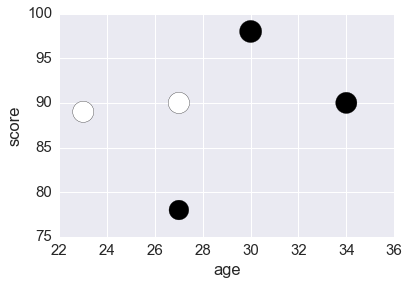

In [276]:
sex = df.sex.astype('category').cat.codes
df.plot.scatter(x='age', y='score', s=df.score*5, c=sex)
pass

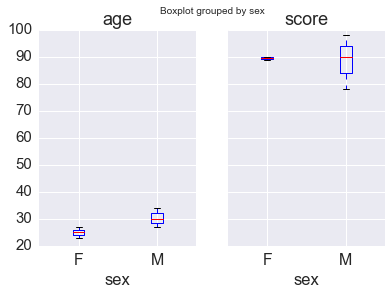

In [272]:
df.boxplot(by ='sex', column = ['age', 'score'], fontsize = 16)
pass

## Exercises

In [239]:
%load_ext version_information

In [240]:
%version_information

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.1.2
OS Darwin 15.6.0 x86_64 i386 64bit
Sun Aug 14 20:50:46 2016 EDT